# **FINAL PROJECT - CODE & ANALYSIS**

## **Executive Summary**

#### Bright Hope's initiative to develop predictive models to facilitate the accurate diagnosis of patients suffering from mood disorders using data from current/past patients is an admirable and worthwhile endeavor, and using ML modeling tools, we believe there is a pathway towards leveraging our in-house data to accomplish this goal.

#### Using the data of ~240 patients and their responses to our questionnaire regarding a series of conditions/afflictions to which they may be subjected, our team ran tests on four different predictive models to determine if this methodology/approach is reliable and capable of facilitating the accurate diagnosis of patients. Per your request to conduct this research and analysis, our results, findings, analysis, and recommendation are below:

#### Our most accurate models - Random Forest and Extra Trees -  both identified the same five variables (read: symptoms/conditions) which are most relevant when diagnosing individuals who may be suffering from a mood disorder:

1. Mood Swings
2. Sexual Activity
3. Sadness
4. Euphoria
5. Optimism

#### Specific observation ranges on these conditions have proven to be strongly indicative of a patient suffering from a mood disorder according to our most accurate modeling results, with these results included in the report below. Regardless of model implementation, these five factors should be given specific attention by our medical professionals (in our opinion as data analysts).

#### Of our four models tested, we believe the Random Forest (RF) Model has the potential to be implemented and used by our staff as an augmentative tool in asssiting our doctors in diagnosing patients who may be suffering from mood disorders. The RF model exhibited the highest degree of accuracy, neglected to misclassify any test data variables (exhibited perfect precision), and operates in such a way that its results can be reliably and easily interpreted in a practical environment, which is essential for our use case. We believe that the 97%+ accuracy of this model is high enough to serve as a **supplement** to doctor's review and analysis of patient symptoms at this stage.

#### While ultimately a model could perfectly predict patient conditions based on a set of provided symptoms and conditions, even with such a high accuracy rate for the RF model, we would not want to risk patient welfare under any circumstances, and as such would only recommend this model be considered deployable as a resource for our medical staff to use in addition to their professional expertise.

#### Going forward, we will continue to refine and test our models to ensure they are accurate and useful for both our staff and patients alike. We would recommend continued access to and more patient data as it becomes available. For in-depth review of our findings and data analysis results, you may refer to our modeling and analytic exercises below.

## **Modeling Exercise - Process & Execution**

### Data Import, Exploratory Analysis & Cleaning

In [123]:
import pandas as pd

MoodData = pd.read_csv("MoodDisorders1.csv")
MoodData.head()

,PersonNum,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,Person-1,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Person-2,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Person-3,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Person-4,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Person-5,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [125]:
MoodData.drop(columns=['PersonNum'], inplace=True)

MoodData.head()

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [127]:
# CColumn Data types
print (f' {MoodData.dtypes}')
# MoodData Dimensions
print (f' {MoodData.shape}')

 Sadness             object
Euphoria            object
Exhaustion          object
Sleeplessness       object
MoodSwing           object
SuicidalThoughts    object
Anorxia             object
Disobedience        object
JustifyBehavior     object
Aggressiveness      object
MoveOn              object
NervousBreakdown    object
AdmitMistakes       object
Overthinking        object
SexualActivity      object
Concentration       object
Optimisim           object
Diagnosis           object
dtype: object
 (240, 18)


In [129]:
# Unique Values & their respective counts
for col in MoodData.columns:
    print(f"Column: {col}")
    print(MoodData[col].value_counts(), "\n")

Column: Sadness
Sadness
Usually       84
Sometimes     84
Most-Often    40
Seldom        32
Name: count, dtype: int64 

Column: Euphoria
Euphoria
Seldom        92
Sometimes     90
Usually       40
Most-Often    18
Name: count, dtype: int64 

Column: Exhaustion
Exhaustion
Sometimes     76
Usually       68
Most-Often    60
Seldom        36
Name: count, dtype: int64 

Column: Sleeplessness
Sleeplessness
Sometimes     88
Usually       68
Most-Often    42
Seldom        42
Name: count, dtype: int64 

Column: MoodSwing
MoodSwing
NO     126
YES    114
Name: count, dtype: int64 

Column: SuicidalThoughts
SuicidalThoughts
NO      126
YES     112
YES       2
Name: count, dtype: int64 

Column: Anorxia
Anorxia
NO     148
YES     92
Name: count, dtype: int64 

Column: Disobedience
Disobedience
NO     146
YES     94
Name: count, dtype: int64 

Column: JustifyBehavior
JustifyBehavior
NO     126
YES    114
Name: count, dtype: int64 

Column: Aggressiveness
Aggressiveness
NO     124
YES    116
Name: co

In [131]:
# Standardizing categorical values
MoodData = MoodData.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Validate standardization
print(MoodData["SuicidalThoughts"].value_counts())

SuicidalThoughts
NO     126
YES    114
Name: count, dtype: int64


In [133]:
# Check for missing values in columns
missing_values = MoodData.isnull().sum()

missing_values[missing_values > 0]

Series([], dtype: int64)

In [135]:
# Check for duplicate rows
duplicate_count = MoodData.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 120


In [137]:
# Display some duplicate rows for inspection to ensure dataset is not compromised
MoodData[MoodData.duplicated()].head()

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
120,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
121,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
122,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
123,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
124,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


### Outlier Check:

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Mark Panning\AppData\Local\Temp\ipykernel_15056\4150383391.py:6: SyntaxWarning: invalid escape sequence '\d'
  MoodData[col] = MoodData[col].str.extract("(\d+)").astype(float)


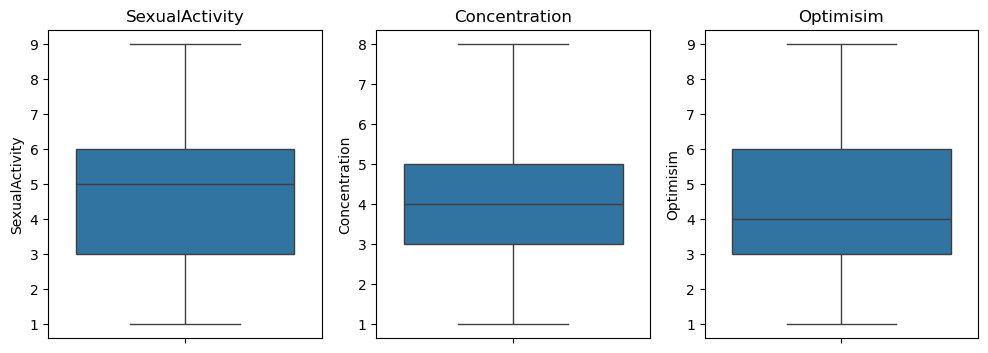

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["SexualActivity", "Concentration", "Optimisim"]
for col in numeric_cols:
    MoodData[col] = MoodData[col].str.extract("(\d+)").astype(float)

plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=MoodData[col])
    plt.title(col)
plt.show()

### Feature Encoding & Target Variable Designation

In [143]:
from sklearn.preprocessing import LabelEncoder

ordinal_mapping = {
    "Seldom": 1,
    "Sometimes": 2,
    "Usually": 3,
    "Most-Often": 4
}

ordinal_cols = ["Sadness", "Euphoria", "Exhaustion", "Sleeplessness"]
for col in ordinal_cols:
    MoodData[col] = MoodData[col].map(ordinal_mapping)

binary_cols = ["MoodSwing", "SuicidalThoughts", "Anorxia", "Disobedience",
               "JustifyBehavior", "Aggressiveness", "MoveOn", "NervousBreakdown",
               "AdmitMistakes", "Overthinking"]

for col in binary_cols:
    MoodData[col] = MoodData[col].map({"NO": 0, "YES": 1})

MoodData.head()

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3.0,3.0,4.0,Bipolar Type-2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4.0,2.0,5.0,Depression
2,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6.0,5.0,7.0,Bipolar Type-1
3,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3.0,2.0,2.0,Bipolar Type-2
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5.0,5.0,6.0,Normal


In [145]:
MoodData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sadness,240.0,2.550000,0.922522,1.0,2.0,3.0,3.00,4.0
Euphoria,240.0,1.933333,0.921463,1.0,1.0,2.0,2.00,4.0
Exhaustion,240.0,2.633333,1.018107,1.0,2.0,3.0,3.25,4.0
Sleeplessness,240.0,2.458333,0.975824,1.0,2.0,2.0,3.00,4.0
MoodSwing,240.0,0.475000,0.500418,0.0,0.0,0.0,1.00,1.0
SuicidalThoughts,240.0,0.475000,0.500418,0.0,0.0,0.0,1.00,1.0
Anorxia,240.0,0.383333,0.487214,0.0,0.0,0.0,1.00,1.0
Disobedience,240.0,0.391667,0.489143,0.0,0.0,0.0,1.00,1.0
JustifyBehavior,240.0,0.475000,0.500418,0.0,0.0,0.0,1.00,1.0
Aggressiveness,240.0,0.483333,0.500766,0.0,0.0,0.0,1.00,1.0


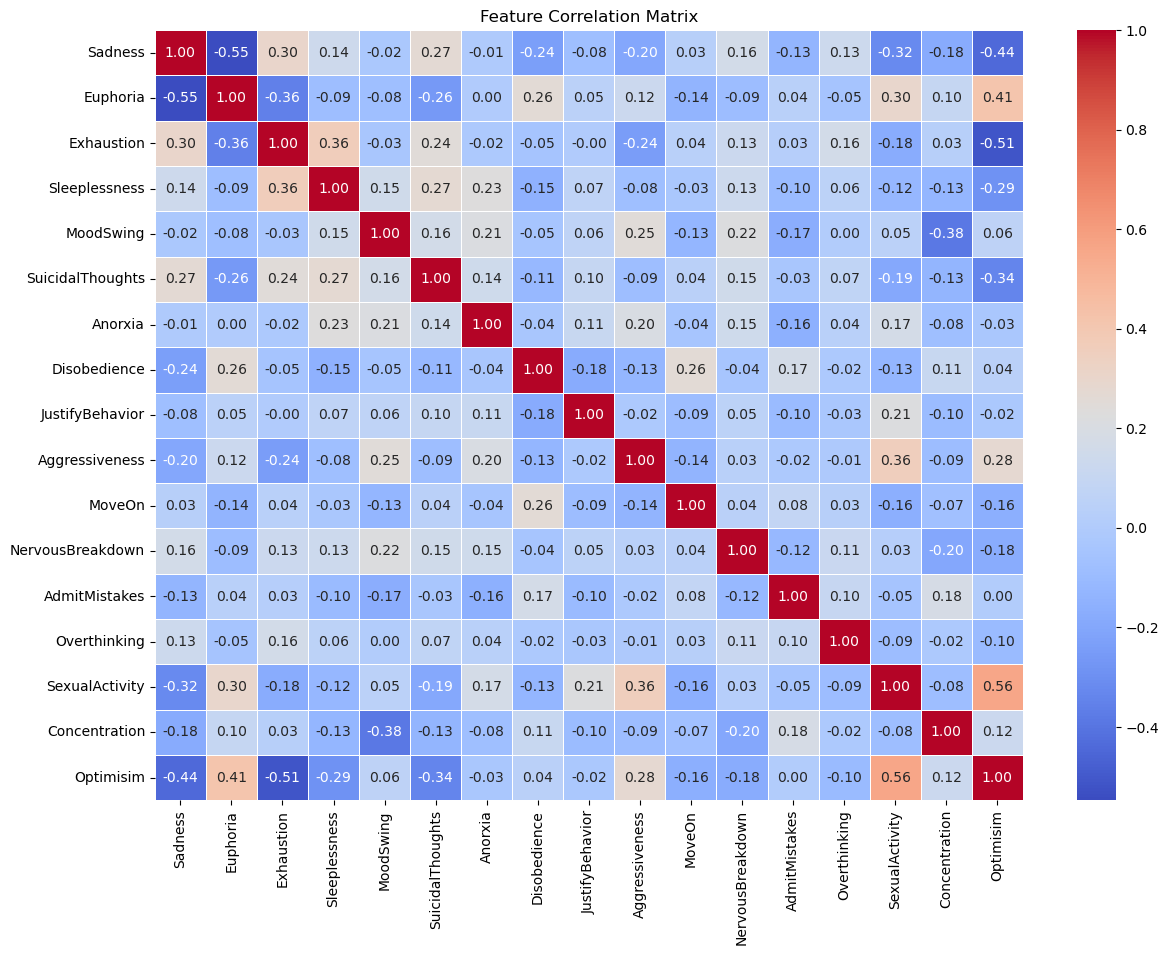

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = MoodData.drop(columns=["Diagnosis"]).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## Correlation Analysis

### Strong Negative Correlation

1. Optimism vs. Sadness: (-0.44)
2. Optimism vs. Exhaustion: (-0.51)
3. Concentration vs. MoodSwing: (-0.38)

### Strong Positive Correlation

1. Sexual Activity vs. Optimism: (0.56)
2. Euphoria vs. Optimism: (0.41)
3. MoodSwing vs. Suicidal Thoughts: (0.25)

### Weak/No Correlation

Multiple Predictors exhibited no/weak correlation with other Predictor variables (e.g. Overthinking & Aggressiveness, Anorexia & Euphoria), indicating independence from each other.

### Application

In isolation, correlations do not provide much actionable or diagnostic information, but they can be useful in predictive analysis by eliminating erroneous diagnosis possibilities through identification of conditions/symptoms which together may be indicative a soecific condition or may eliminate certain diagnoses from possibility.

# **Data Distribution**

### Boxplot Visualization

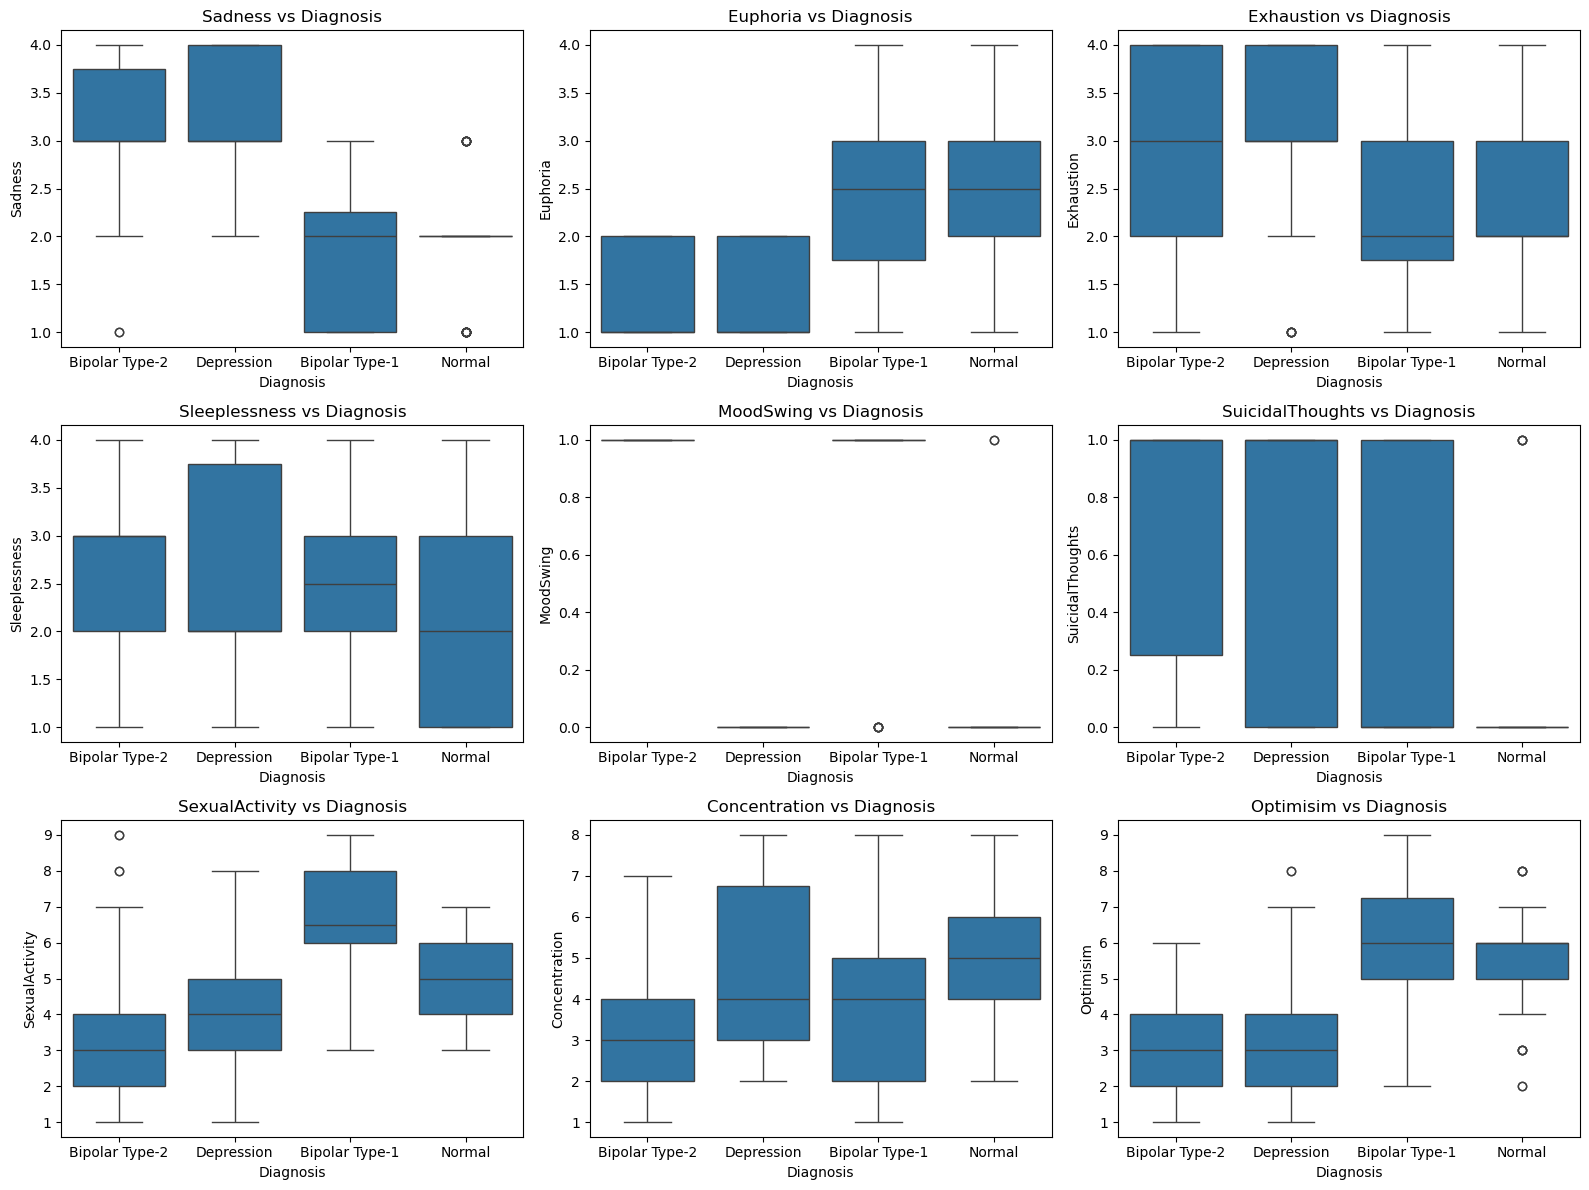

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

features_to_plot = ["Sadness", "Euphoria", "Exhaustion", "Sleeplessness",
                    "MoodSwing", "SuicidalThoughts", "SexualActivity",
                    "Concentration", "Optimisim"]

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=MoodData["Diagnosis"], y=MoodData[feature])
    plt.title(f"{feature} vs Diagnosis")
    
plt.tight_layout()
plt.show()

### Violin Plot Visualization

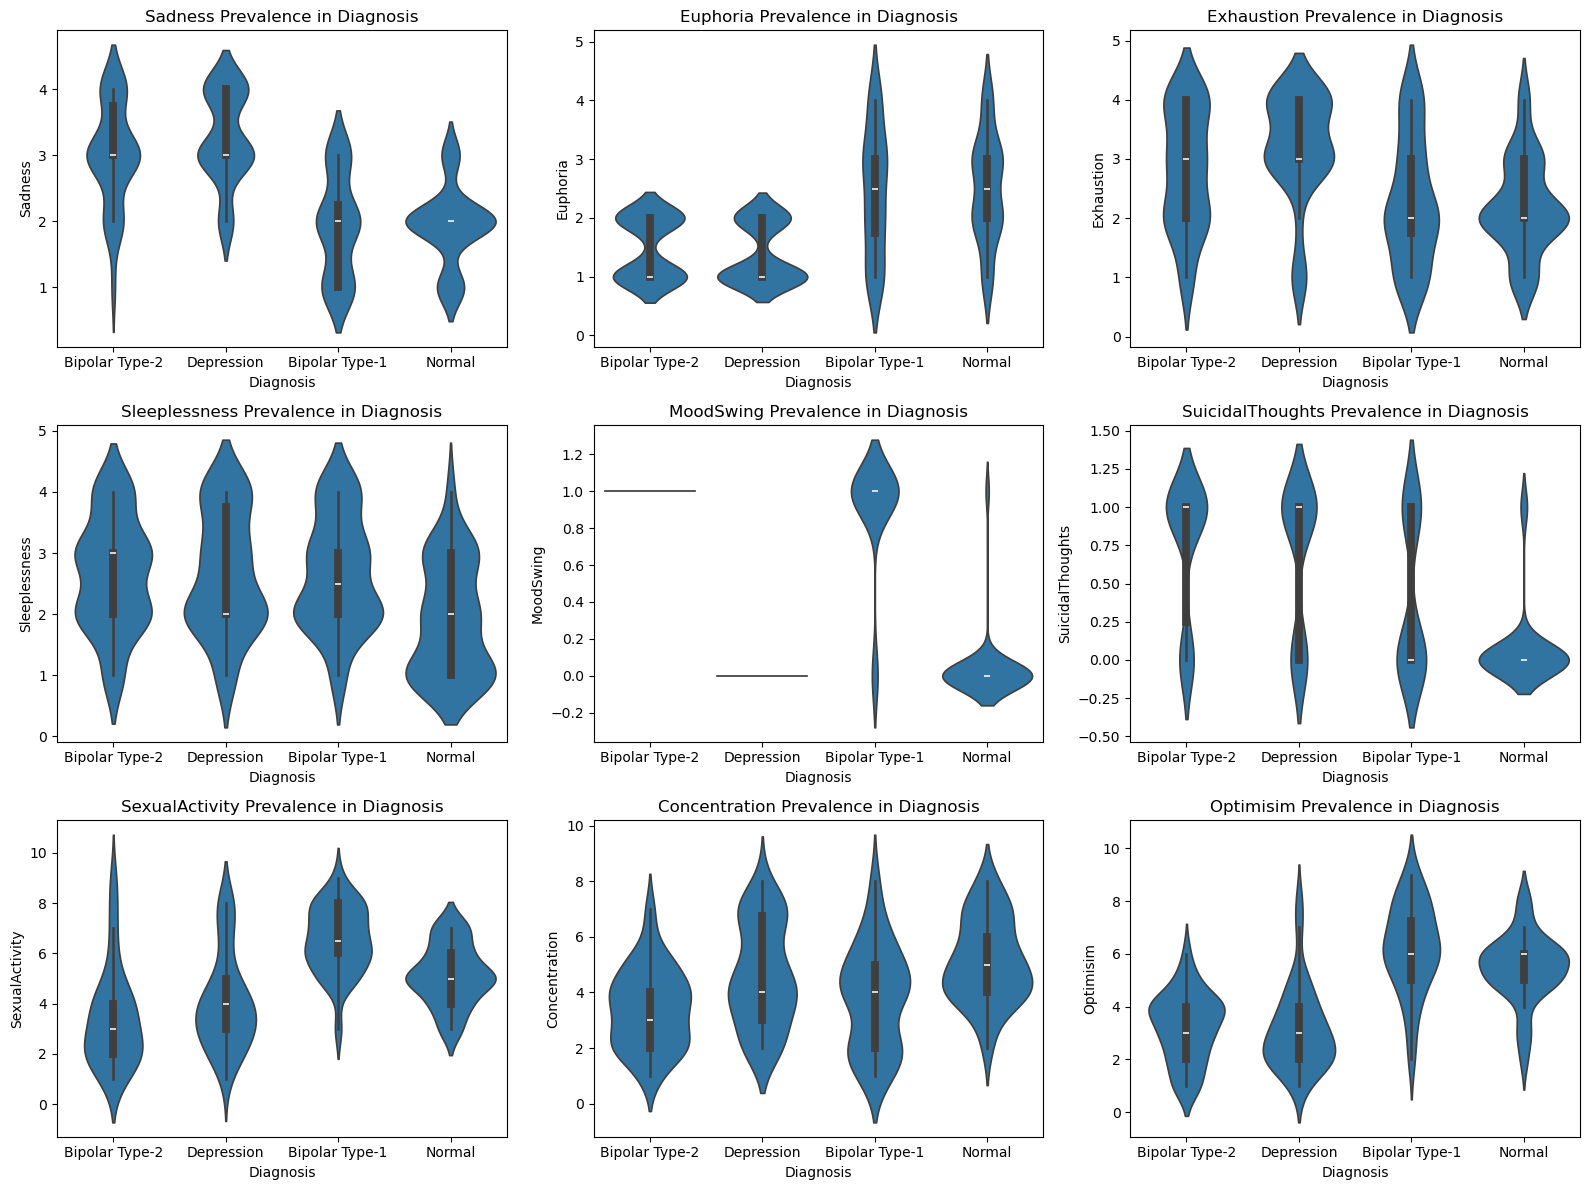

In [154]:
plt.figure(figsize=(16, 12))

features_to_plot = ["Sadness", "Euphoria", "Exhaustion", "Sleeplessness",
                    "MoodSwing", "SuicidalThoughts", "SexualActivity",
                    "Concentration", "Optimisim"]

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=MoodData["Diagnosis"], y=MoodData[feature])
    plt.title(f"{feature} Prevalence in Diagnosis")

plt.tight_layout()
plt.show()

### Histograms

#### NOTE - These graphs cannot be reliably used to draw conclusions in isolation, due to Target Variable being categorical data type.

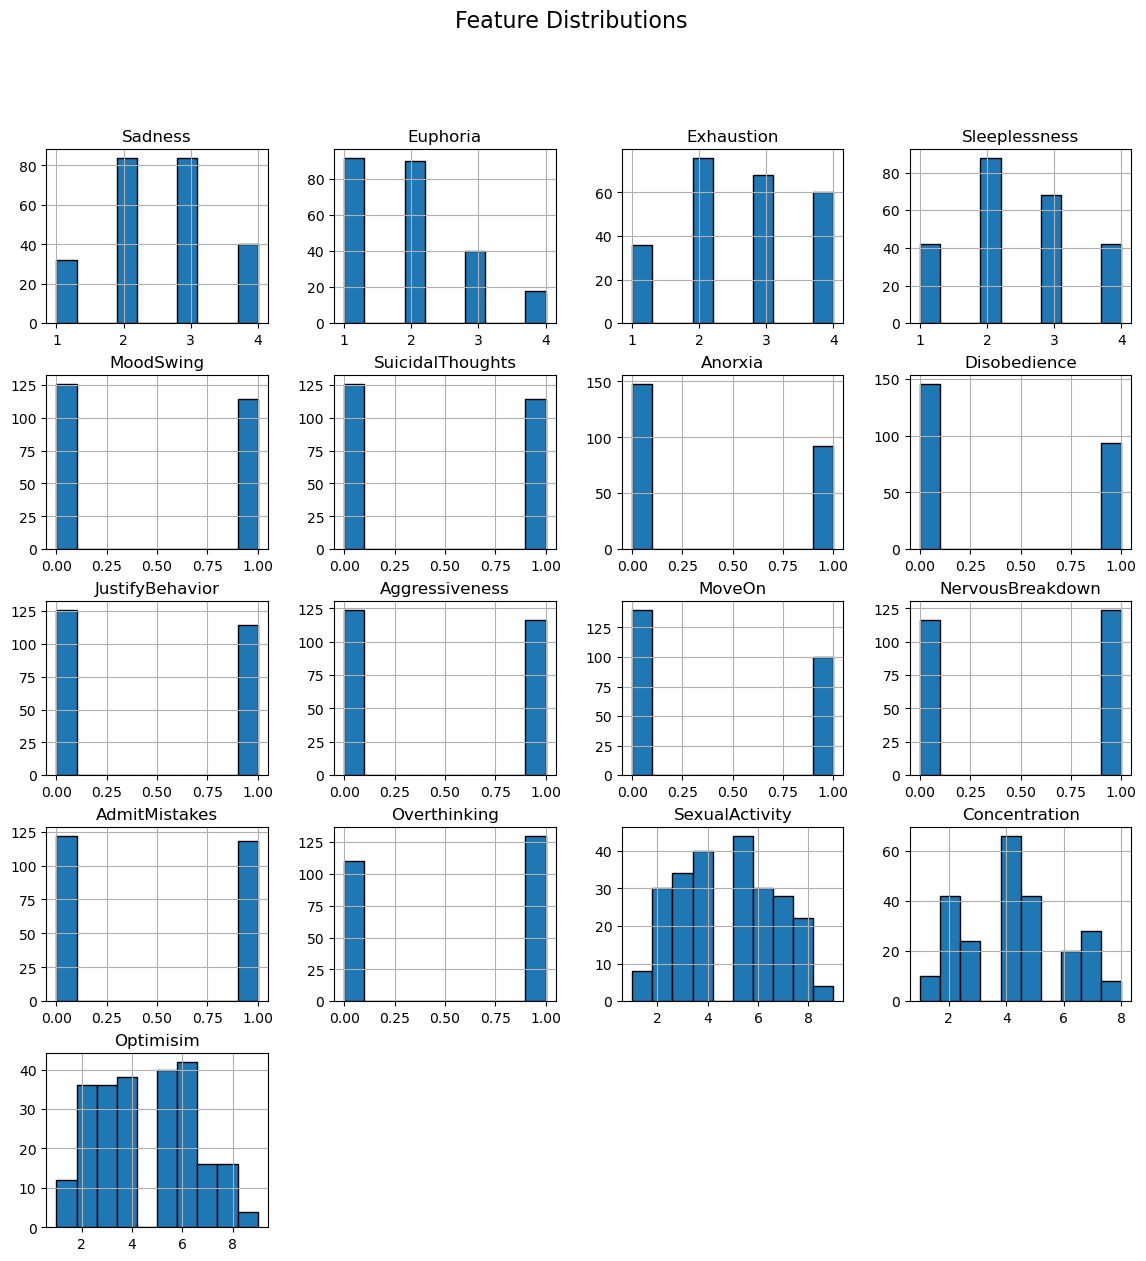

In [158]:
MoodData.drop(columns=["Diagnosis"]).hist(figsize=(14, 14), bins=10, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### **Data Distribution Analysis**

#### 1. Sadness vs. Diagnosis
- Depression & T2-BPD: materially consistent sadness levels (~ 3 - 4)
- T1-BPD & Normal Patients: low sadness (~ 2 - 3)
- Sadness much more prevalent/severe for individuals diagnosed with Depression & T2-BPD

#### 2. Euphoria vs. Diagnosis
- T1-BPD & Normal Patients: consistent low-moderate euphoria (~ 3 - 4)
- Depression & T2-BPD: distinctly low euphoria reported by patients (~ 2 - 3)
- Euphoria generally reported lower across all patients, may not be the best variable to use for diagnosis

#### 3. Exhaustion vs. Diagnosis
- T2-BPD & Depression: high(er) exhaustion (~ 3 - 4)
- T1-BPD & Normal Patients: lower levels of exhaustion (~ 1 - 3)
- Exhaustion very prevalent in Depressed individuals (evidenced by Violin plots), widely distributed in T2-BPD patients

#### 4. Mood Swings vs. Diagnosis
- T1-BPD & T2-BPD: much more likely to report mood swings (answer "Yes")
- Depression & Normal Patients: less likely to report mood swings

#### 5. Suicidal Thoughts vs. Diagnosis
- Depression and BPD: Non-Normal patients much more likely to report experiencing suicidal thoughts
- Histograms indicate the suicidal thoughts experienced across all patients are generally negligible or very severe, leading this to be a potential key identifier of a mood disorder

#### 6. Sexual Activity vs. Diagnosis
- T1-BPD patients reported higher sexual activity (median ~ 7)
- Depressed & T2-BPD patients reported lower average sexual activity (~ 3 - 5)

#### 7. Concentration vs. Diagnosis
- T2-BPD patients reported lowest average concentration (1 - 3)
- Normal patients reported highest average concentration (at least 5)
- Concentration levels in T2-BPD patients tend to have lower concentration levels than other patients (evidenced by violin plots), though the general distribution is quite wide across BPD patients

#### 8. Optimism vs. Diagnosis
- T1-BPD & Normal Patients: higher reported optimism (~ 6 - 8)
- Depression & T2-BPD: lower reported optimism(~ 2 - 4)

### Feature Engineering

#### Scaling Predictor Variables

In [164]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = MoodData.columns[MoodData.columns != "Diagnosis"]

scaler = MinMaxScaler()
MoodData[feature_cols] = scaler.fit_transform(MoodData[feature_cols])

MoodData.head()

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,0.666667,0.000000,0.333333,0.333333,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.250,0.285714,0.375,Bipolar Type-2
1,0.666667,0.000000,0.666667,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.142857,0.500,Depression
2,0.333333,1.000000,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.625,0.571429,0.750,Bipolar Type-1
3,0.666667,0.000000,0.666667,1.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.250,0.142857,0.125,Bipolar Type-2
4,0.666667,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.500,0.571429,0.625,Normal


#### Target Variable Encoding

In [167]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

MoodData["Diagnosis"] = label_encoder.fit_transform(MoodData["Diagnosis"])

MoodData["Diagnosis"].value_counts()

Diagnosis
1    62
2    62
3    60
0    56
Name: count, dtype: int64

In [169]:
print(MoodData.info())

MoodData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sadness           240 non-null    float64
 1   Euphoria          240 non-null    float64
 2   Exhaustion        240 non-null    float64
 3   Sleeplessness     240 non-null    float64
 4   MoodSwing         240 non-null    float64
 5   SuicidalThoughts  240 non-null    float64
 6   Anorxia           240 non-null    float64
 7   Disobedience      240 non-null    float64
 8   JustifyBehavior   240 non-null    float64
 9   Aggressiveness    240 non-null    float64
 10  MoveOn            240 non-null    float64
 11  NervousBreakdown  240 non-null    float64
 12  AdmitMistakes     240 non-null    float64
 13  Overthinking      240 non-null    float64
 14  SexualActivity    240 non-null    float64
 15  Concentration     240 non-null    float64
 16  Optimisim         240 non-null    float64
 1

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,0.666667,0.000000,0.333333,0.333333,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.250,0.285714,0.375,1
1,0.666667,0.000000,0.666667,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.142857,0.500,2
2,0.333333,1.000000,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.625,0.571429,0.750,0
3,0.666667,0.000000,0.666667,1.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.250,0.142857,0.125,1
4,0.666667,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.500,0.571429,0.625,3


### **Model Construction**

#### Split Dataset into Test & Train Data

In [173]:
from sklearn.model_selection import train_test_split

X = MoodData.drop(columns=["Diagnosis"])
y = MoodData["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (192, 17)
Testing set size: (48, 17)


In [175]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy

    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

kfold_results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    kfold_results[name] = scores.mean()
    print(f"\n{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

print("\nModel Performance Summary (Test Set):", model_results)
print("\nK-Fold Validation Summary:", kfold_results)


KNN Accuracy: 0.7708
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.73      0.85      0.79        13
           2       0.82      0.75      0.78        12
           3       0.83      0.83      0.83        12

    accuracy                           0.77        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48


Confusion Matrix:
[[ 7  4  0  0]
 [ 2 11  0  0]
 [ 1  0  9  2]
 [ 0  0  2 10]]

Decision Tree Accuracy: 0.9583
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        

## **Model Analysis & Selection**

### 1. K-Nearest Neighbors
- Accuracy too low for acceptable use in medical field (~77%)
- Issues with misclassification across multiple categories would be problematic for predictive diagnosis/triage of patients (evidenced by confusion matrix)

### 2. Decision Tress
- Highly accurate, albeit prone to overfitting risk
- Minimal variance with cross-validation
- May be improved if presented with additional/larger dataset for training

### 3. Random Forest
- 100% accurate when classifying test data
- Minimal variance with cross-validation
- Improved generalization over KNN & DT models
- Potential risk of overfitting
- Can be considered viable for professional deployment if controlled/modified to address overfitting possibility

### 4. Extra Trees Classifier
- Identical to Random Forest Model in performance
- Runs faster than RF, although speed should not be a factor in a discussion of seconds/minutes when it comes to properly diagnosing patients
- Strong generalization & highly stable

## Model Evaluation & Comparisons

### K-Fold Cross Validation

In [187]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

kfold_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    kfold_results[name] = scores.mean()
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

print("\nK-Fold Validation Results:", kfold_results)

KNN Cross-Validation Accuracy: 0.7553 ± 0.0663
Decision Tree Cross-Validation Accuracy: 0.9583 ± 0.0357
Random Forest Cross-Validation Accuracy: 0.9738 ± 0.0288
Extra Trees Cross-Validation Accuracy: 0.9634 ± 0.0358

K-Fold Validation Results: {'KNN': 0.7553306342780027, 'Decision Tree': 0.9582995951417004, 'Random Forest': 0.9738191632928477, 'Extra Trees': 0.9634278002699055}


### K-Fold Cross Validation Accuracy Comparison

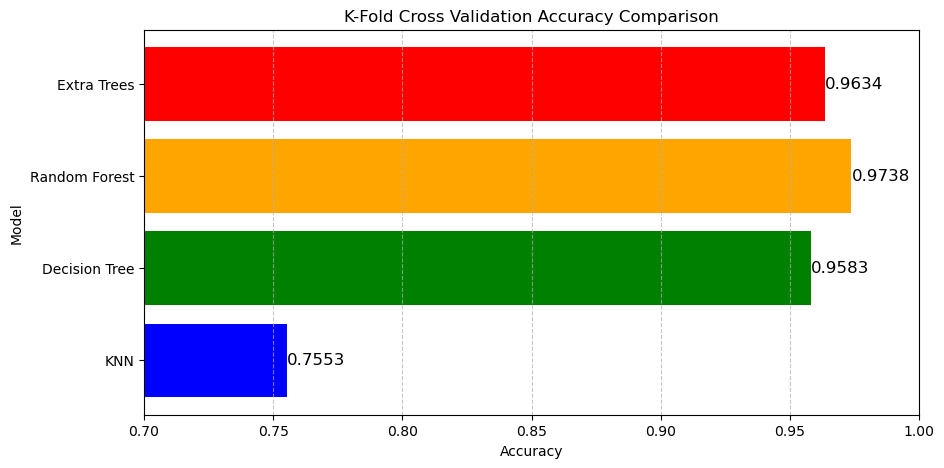

In [190]:
model_names = list(kfold_results.keys())
accuracies = list(kfold_results.values())

plt.figure(figsize=(10, 5))
plt.barh(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0.7, 1.0)
plt.title("K-Fold Cross Validation Accuracy Comparison")
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(accuracies):
    plt.text(value, index, f"{value:.4f}", va='center', fontsize=12)

plt.show()

### Cross Validation Accuracy

#### 1. KNN
- Performance is inconsistent, with the highest standard deviation and lowest accuracy
- Unacceptable performance when considering predictive model for deployment

#### 2. Decision Tree
- High accuracy but potentially error-prone due to limited data

#### 3. Random Forest
- Best performance with highest accuracy (97%+)
- Lower variance, indicating better generalization
- **Of models tested, most viable option for deployment in medical environment, although cannot be used in isolation**

#### 4. Extra Trees
- Identical in performance to RF model
- Second best option relative to RF model, as RF model is preferable when interpretability is a desired attribute of the model, which is significantly important when using such information and models to assist in the traige/diagnosis of patients

## Predictive Model Confusion Matrix


 Confusion Matrices for Each Model


KNN Performance:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.73      0.85      0.79        13
           2       0.82      0.75      0.78        12
           3       0.83      0.83      0.83        12

    accuracy                           0.77        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48



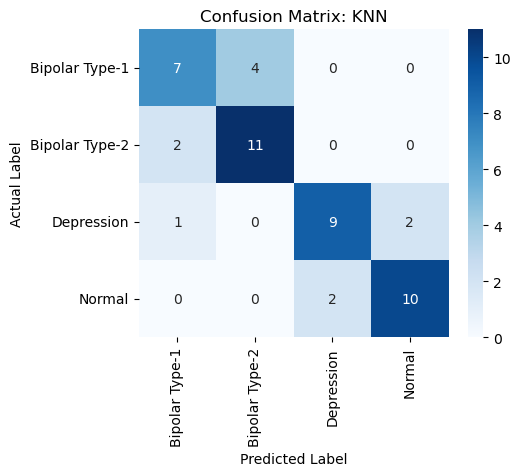


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



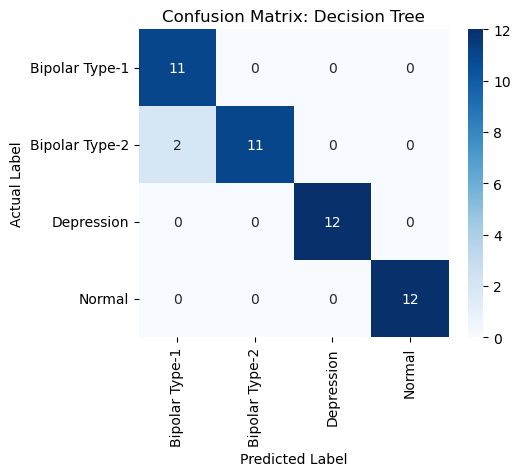


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



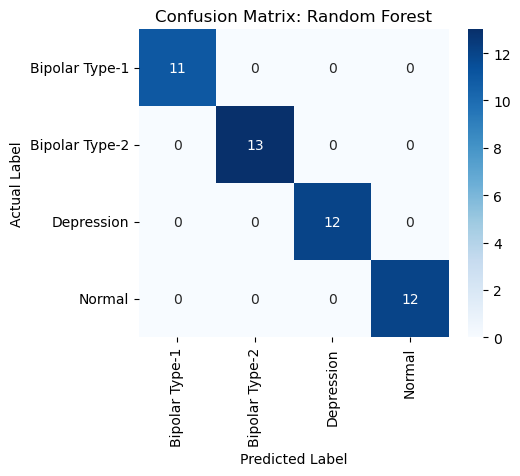


Extra Trees Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



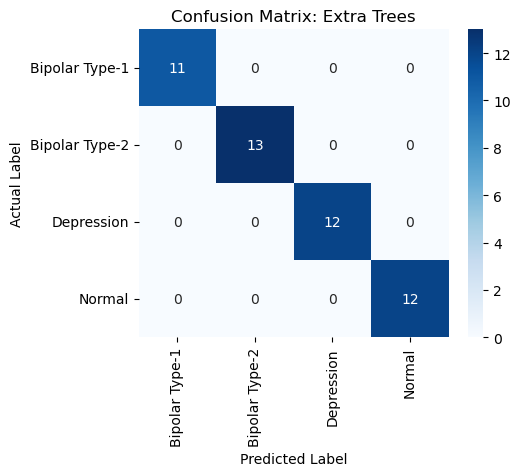

In [197]:
from sklearn.metrics import confusion_matrix, classification_report

print("\n Confusion Matrices for Each Model\n")

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, name)

## Model Performance (Accuracy, Precision, Recall, Sensitivity, Specificity, F1 Score)

In [205]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def specificity_score(y_true, y_pred, average='macro'):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm.sum(axis=1) - cm.diagonal()
    fp = cm.sum(axis=0) - cm.diagonal()
    tn_fp = tn + fp
    
    specificity = np.divide(tn, tn_fp, out=np.zeros_like(tn, dtype=float), where=tn_fp!=0)
    
    return specificity.mean() if average == 'macro' else specificity

performance_metrics = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    specificity = specificity_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    performance_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall (Sensitivity)": recall,
        "Specificity": specificity,
        "F1-Score": f1
    }
    
    print(f"\n{name} Model Performance:")
    print(f" Accuracy: {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall (Sensitivity): {recall:.4f}")
    print(f" Specificity: {specificity:.4f}")
    print(f" F1-Score: {f1:.4f}")

print("\n **Final Model Performance Metrics**")
for model, metrics in performance_metrics.items():
    print(f"\n🔹 **{model}**")
    for metric, value in metrics.items():
        print(f"   - {metric}: {value:.4f}")


KNN Model Performance:
 Accuracy: 0.7708
 Precision: 0.7712
 Recall (Sensitivity): 0.7665
 Specificity: 0.5012
 F1-Score: 0.7671

Decision Tree Model Performance:
 Accuracy: 0.9583
 Precision: 0.9615
 Recall (Sensitivity): 0.9615
 Specificity: 0.2500
 F1-Score: 0.9583

Random Forest Model Performance:
 Accuracy: 1.0000
 Precision: 1.0000
 Recall (Sensitivity): 1.0000
 Specificity: 0.0000
 F1-Score: 1.0000

Extra Trees Model Performance:
 Accuracy: 1.0000
 Precision: 1.0000
 Recall (Sensitivity): 1.0000
 Specificity: 0.0000
 F1-Score: 1.0000

 **Final Model Performance Metrics**

🔹 **KNN**
   - Accuracy: 0.7708
   - Precision: 0.7712
   - Recall (Sensitivity): 0.7665
   - Specificity: 0.5012
   - F1-Score: 0.7671

🔹 **Decision Tree**
   - Accuracy: 0.9583
   - Precision: 0.9615
   - Recall (Sensitivity): 0.9615
   - Specificity: 0.2500
   - F1-Score: 0.9583

🔹 **Random Forest**
   - Accuracy: 1.0000
   - Precision: 1.0000
   - Recall (Sensitivity): 1.0000
   - Specificity: 0.0000
   - 

## Hyperparamter Tuning for Decision Tree & Random Forest

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [3, None],  
    'min_samples_split': [2, 5]
}

param_grid_rf = {
    'n_estimators': [50, 100], 
    'max_depth': [3, None]
}

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

print(" Running Grid Search for Decision Tree...")
grid_dt.fit(X_train, y_train)
print(" Running Grid Search for Random Forest...")
grid_rf.fit(X_train, y_train)

print(" Best Parameters - Decision Tree:", grid_dt.best_params_)
print(" Best Parameters - Random Forest:", grid_rf.best_params_)

best_dt = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
best_rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)

best_dt.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

print("\n Decision Tree Test Accuracy:", best_dt.score(X_test, y_test))
print(" Random Forest Test Accuracy:", best_rf.score(X_test, y_test))

 Running Grid Search for Decision Tree...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
 Running Grid Search for Random Forest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
 Best Parameters - Decision Tree: {'max_depth': None, 'min_samples_split': 5}
 Best Parameters - Random Forest: {'max_depth': None, 'n_estimators': 100}

 Decision Tree Test Accuracy: 0.9375
 Random Forest Test Accuracy: 1.0


## Overfitting & Model Validation - Learning Curves

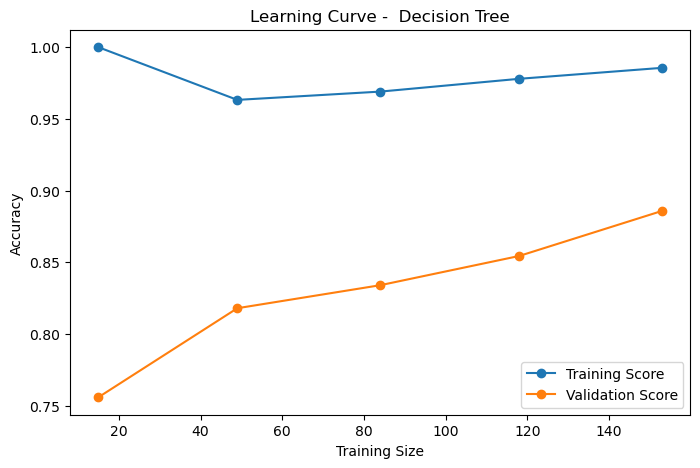

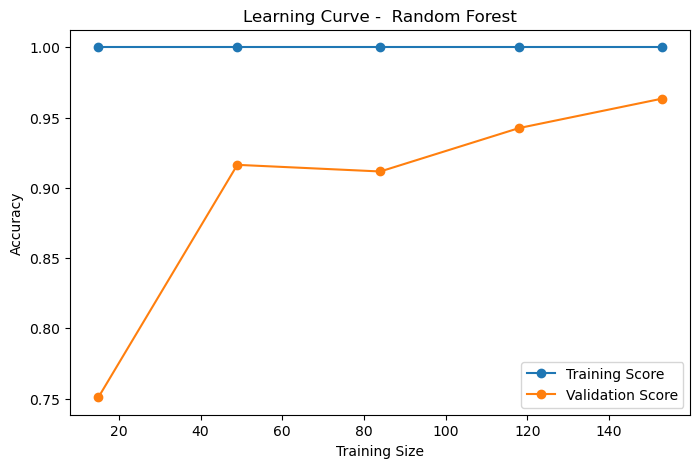

In [214]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot learning curves
plot_learning_curve(best_dt, "Learning Curve -  Decision Tree")
plot_learning_curve(best_rf, "Learning Curve -  Random Forest")

## Feature Analysis

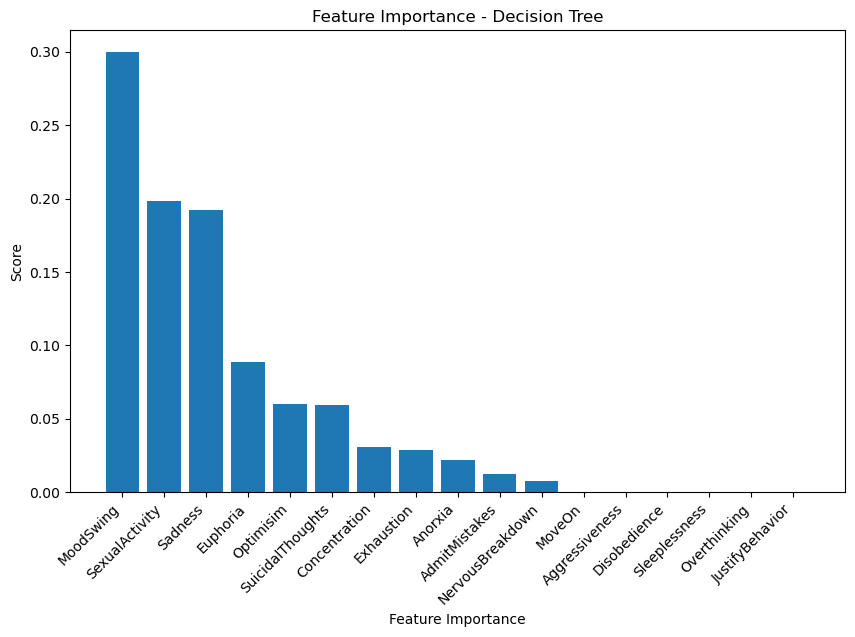

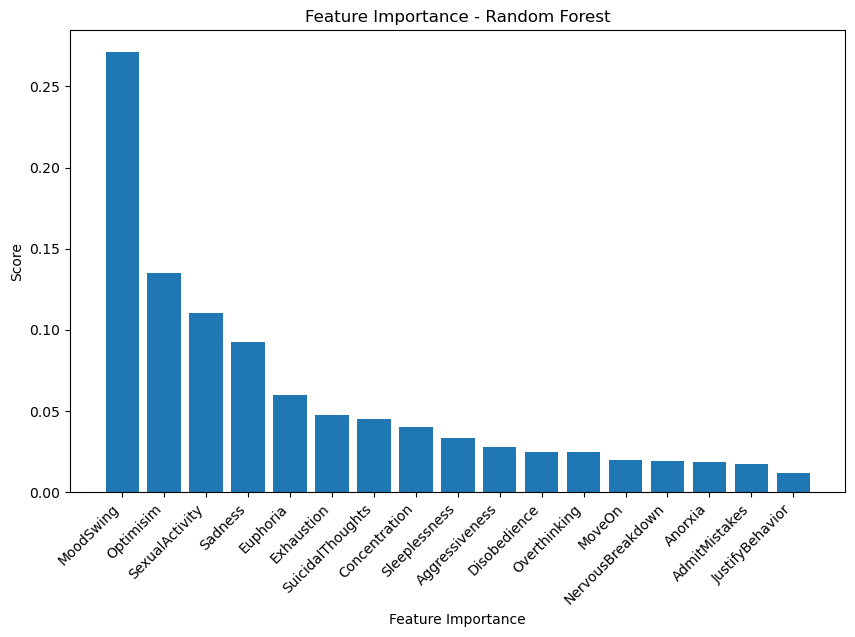

In [217]:
def plot_feature_importance(model, model_name, feature_names):
    importance = model.feature_importances_
    sorted_indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importance[sorted_indices], align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_indices], rotation=45, ha="right")
    plt.xlabel("Feature Importance")
    plt.ylabel("Score")
    plt.title(f"Feature Importance - {model_name}")
    plt.show()

best_dt_model = grid_dt.best_estimator_
best_rf_model = grid_rf.best_estimator_

plot_feature_importance(best_dt_model, "Decision Tree", X_train.columns)

plot_feature_importance(best_rf_model, "Random Forest", X_train.columns)

### 5 Features most Relevant to Diagnosis

#### 1. Decision Tree
- Mood Swings
- Sexual Activity
- Sadness
- Euphoria
- Optimism

#### 2. Random Forest
- Mood Swings
- Optimism
- Sexual Activity
- Sadness
- Euphoria

#### Broadly speaking, both models recognize the importance of the same five predictor variables, although each model weighs these variables differently in their importance, which impacts reliability and generalizability.

## **Summary & Analysis**

#### 1. K-Nearest Neighbors
- Accuracy too low for acceptable use in medical field (~77%)
- Issues with misclassification across multiple categories would be problematic for predictive diagnosis/triage of patients (evidenced by confusion matrix)

#### 2. Decision Tress
- Highly accurate, albeit prone to overfitting risk
- Minimal variance with cross-validation
- May be improved if presented with additional/larger dataset for training

#### 3. Random Forest
- 100% accurate when classifying test data
- Minimal variance with cross-validation
- Improved generalization over KNN & DT models
- Potential risk of overfitting
- Can be considered viable for professional deployment if controlled/modified to address overfitting possibility
- Of predictive models tested, **best suited for production/deployment**

#### 4. Extra Trees Classifier
- Identical to Random Forest Model in performance
- Runs faster than RF, although speed should not be a factor in a discussion of seconds/minutes when it comes to properly diagnosing patients
- Strong generalization & highly stable

#### Five most relevant conditions for mood disorder diagnosis
- Mood Swings
- Sexual Activity
- Sadness
- Euphoria
- Optimism

#### Modeling and Analysis Shortcomings/Limitations
- Potentially insufficient data (only ~240 observations)
- Risk of overfitting on even the most accurate predictive models
- Change of patient questionnaires in the future may render this model ineffective